In [ ]:
# simple Linear Regression 단순 선형회귀 : y = mx + b
# Multiple Linear Regression 다중 선형회귀 : y = b+ m1x1 +m2x2....
# Polynomial Regression 다항회귀 : y = b+ m1x + m2x^2 + ...mnx^2


## 03. Polynomial Regression
### 공부 시간에 따른 시험 점수(우등생)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("PolynomialRegressionData.csv")
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]


## 3-1 단순 선형 회귀(simple Linear Regression)

In [3]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y) # 전체 데이터로 학습 진행 # LinearRegression class에 있는 함수 fit으로 학습을 시켜야 predict든 머든 사용할 수 있다

LinearRegression()

### 데이터 시각화

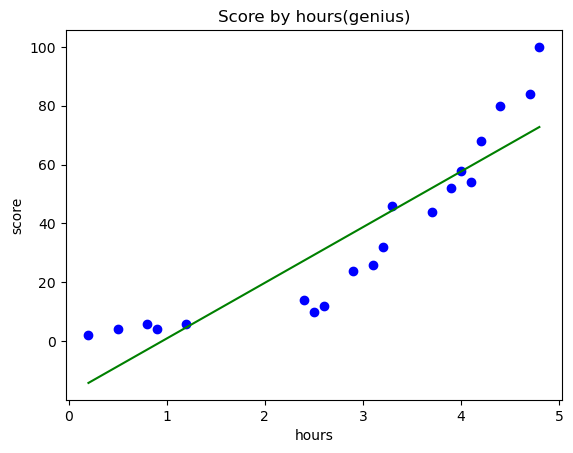

In [4]:
plt.scatter(X,y,color='blue') #산점도
plt.plot(X,reg.predict(X),color='green') # X에 대한 선형회귀 값이 Y 값으로 선 그래프로 그려짐
plt.title('Score by hours(genius)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [5]:
reg.score(X,y) # 전체 데이터를 통한 모델 평가

0.8169296513411765

## 3-2 다항회귀(Polynomial Regression)

In [6]:
from sklearn.preprocessing import PolynomialFeatures   # 몇 차 다항식으로 할지 설정 가능
poly_reg = PolynomialFeatures(degree=4) # 2차 다항식
X_poly = poly_reg.fit_transform(X)  # X를 다항식에서 사용할 수 있게 변환해주는 과정  poly_reg은 polynomialFeatures 인데 이 변수에 대해 fit_transform(degree=2) 라는 함수를 실행시켜서 X의 값을 학습시키고, 변환한다
# poly_reg.fit()
# poly_reg.transform(X)  각각 따로 불러올 수 도있음
X_poly[:5]   # [X] -> [X^0, X^1, X^2] -> X가 3이면 [1,3,9] 로 변환


array([[1.0000e+00, 2.0000e-01, 4.0000e-02, 8.0000e-03, 1.6000e-03],
       [1.0000e+00, 5.0000e-01, 2.5000e-01, 1.2500e-01, 6.2500e-02],
       [1.0000e+00, 8.0000e-01, 6.4000e-01, 5.1200e-01, 4.0960e-01],
       [1.0000e+00, 9.0000e-01, 8.1000e-01, 7.2900e-01, 6.5610e-01],
       [1.0000e+00, 1.2000e+00, 1.4400e+00, 1.7280e+00, 2.0736e+00]])

In [7]:
X[:5]

,hour
0,0.2
1,0.5
2,0.8
3,0.9
4,1.2


In [8]:
poly_reg.get_feature_names_out()

array(['1', 'hour', 'hour^2', 'hour^3', 'hour^4'], dtype=object)

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)  # 변환된 X와 y를 가지고 모델 생성(학습) / 전체 데이터는 맞음

LinearRegression()

### 데이터 시각화(변환된 X와 y)

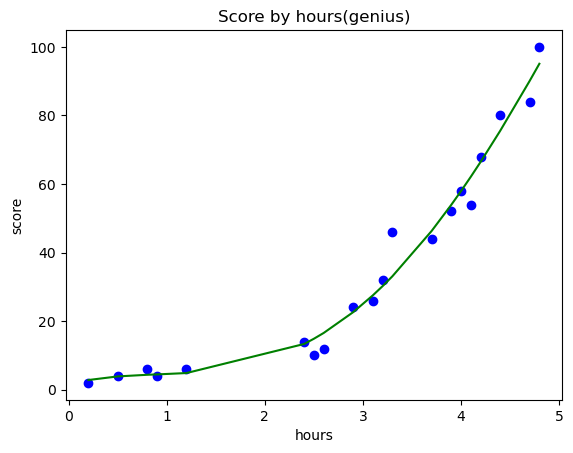

In [10]:
plt.scatter(X,y, color='blue')
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color='green')   # poly_reg.fit_transform(X) 다항식으로 구할 수 있음
plt.title('Score by hours(genius)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [16]:
from sklearn.preprocessing import MinMaxScaler
X = float(X)
y = float(y)

TypeError: float() argument must be a string or a real number, not 'DataFrame'

In [13]:
X_range = np.arange(min(X), max(X), 0.1) # X 의 최소값에서 최대값까지의 범위를 0.1 단위로 잘라서 데이터를 생성\n",
X_range

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [14]:
X_range.shape

NameError: name 'X_range' is not defined

In [ ]:
X_range = X_range.reshape(-1, 1)  #(row, column갯수) / (-1,1) 데이터 전체에 대해 컬럼을 1개로 만들고 로우는 자동으로 계산해줌


In [ ]:
X_range[:5]

### 공부 시간에 따른 시험 성적 예측

In [ ]:
reg.predict([[2]]) # 2시간 공부했을 때 선형 회귀 모델의 예측

In [ ]:
lin_reg.predict(poly_reg.fit_transform([[2]])) # 2시간 공부했을 때 다항 회귀 모델의 예측

In [ ]:
lin_reg.score(X_poly, y) # 다항 회귀 모델 평가